# Goal

Define Neuron and implement Linear and Logistics Regressions using a single TF tenor

# Solution

In [1]:
import numpy as np
import tensorflow as tf

2023-11-11 16:39:57.407308: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Regression

A single neuron in TF is one instance of a Linear Regression model:

$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b$$

In [2]:
single_neuron_linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=1, activation="linear", name="L1"), # layer 0: 1 linear neuron with 1 feature
])

neuron = single_neuron_linear.layers[0]

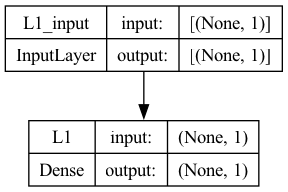

In [3]:
from tensorflow.keras.utils import plot_model

# Visualize the model
plot_model(single_neuron_linear, to_file='Lab1_single_neuron.png', show_shapes=True, show_layer_names=True)


Prediction

A small dataset with flat sizes (x) and flat prices (y):<br>

| x - Size (1000 sqft)     | y - Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |

In [4]:
x = np.array([[1.0], [2.0]])
y = np.array([[300.0], [500.0]])

# weights copied from Linear Regression solution of Lab 1 (see previous course)
w = np.array([[200]])
b = np.array([100])

neuron.set_weights([w, b])

Prediction

In [5]:
prediction = neuron(x)
print(f"Result is stored as {type(prediction)}")
print(f"Result: {prediction}")

Result is stored as <class 'tensorflow.python.framework.ops.EagerTensor'>
Result: [[300.]
 [500.]]


Calcuate manually

In [6]:
linear_function = lambda x, w, b: np.dot(x, w) + b

manual_calculation = linear_function(x, w, b)

Comparison - prediction Vs manual calculation Vs target

In [7]:
print(f"Result is stored as {type(neuron(x))}")
print(f"Result: {np.c_[prediction, manual_calculation, y]}")

Result is stored as <class 'tensorflow.python.framework.ops.EagerTensor'>
Result: [[300. 300. 300.]
 [500. 500. 500.]]


### Classification

A single neuron in TF is one instance of a Logistic Regression model:

$$g(f_{\mathbf{w},b}(x)) = \frac{1}{1+e^{-(w \cdot x + b)}}$$

In [8]:
single_neuron_logistics = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=2, activation="sigmoid"), # layer 0: 1 neuron with 2 features
])

neuron = single_neuron_logistics.layers[0]

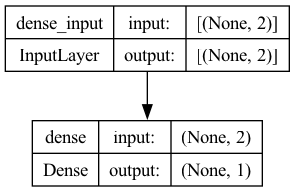

In [9]:
from tensorflow.keras.utils import plot_model

# Visualize the model
plot_model(single_neuron_logistics, to_file='Lab1_single_neuron.png', show_shapes=True, show_layer_names=True)


Prediction

In [10]:
x = np.array([[0.5, 1.5], [1, 1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

w = np.array([[5.28123029],[5.07815608]])
b = np.array([-14.222409982019839])

neuron.set_weights([w, b])

prediction = neuron(x)

Calculate manually

In [11]:
sigmoid = lambda x, w, b : 1 / (1 + np.exp(-1 * (np.dot(x, w) + b) ) )

manual_calculation = sigmoid(x, w, b)

Comparison - prediction Vs manual calculation Vs target

In [12]:
print(f"Result is stored as {type(neuron(x))}")
print(f"Result: {np.c_[prediction, manual_calculation, y]}")

Result is stored as <class 'tensorflow.python.framework.ops.EagerTensor'>
Result: [[0.01862298 0.01862297 0.        ]
 [0.02057228 0.02057229 0.        ]
 [0.0227209  0.02272091 0.        ]
 [0.98463774 0.98463772 1.        ]
 [0.99849337 0.99849336 1.        ]
 [0.97711694 0.97711696 1.        ]]
